In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import re

### 1.1 Read in the dataset personality_scores.csv in this repo. Examine the data frame for duplicates (based on ID), and drop any duplicates that exist. Assert that the new data frame is the length of the unique entries of the original data frame.



In [4]:
personality = pd.read_csv('personality_scores.csv', sep =';')

In [5]:
personality_tidy = personality.drop_duplicates(subset = 'ID') 
personality_tidy = personality.set_index('ID')
personality_tidy.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
personality.ID.isnull().sum()

0

### 1.2 Write functions that will (1) convert the answer on each of the personality test questions to a number, as set out in scoring, and (2) calculate total scores for each of the subscales (conscientiousness, emotional stability, openness to new experience, agreeableness, extraversion). As you are doing this, first create unit tests that will test that the functions work as they should.

In [7]:
def assignments_score(row_items, number, data):
    '''Returns a count with
    Row = 'Iteration of Rows'
    number = 'Personality it belongs to'
    data = dataframe
    '''
    count = 0
    for column in data.columns:
        breakdown = row_items[column]
        if type(breakdown) == str:
            tup_break = breakdown[1]
            result = int(breakdown[4])
            if tup_break == number:
                count += result
    return count

personality_tidy['Extraversion'] = personality_tidy.apply(lambda row_items : assignments_score(row_items,'1', personality_tidy), axis = 1)
personality_tidy['Agreeableness'] = personality_tidy.apply(lambda row_items : assignments_score(row_items,'2', personality_tidy), axis = 1)
personality_tidy['Conscientiousness'] = personality_tidy.apply(lambda row_items : assignments_score(row_items,'3', personality_tidy), axis = 1)
personality_tidy['Neuroticism'] = personality_tidy.apply(lambda row_items : assignments_score(row_items,'4', personality_tidy), axis = 1)
personality_tidy['Imagination'] = personality_tidy.apply(lambda row_items : assignments_score(row_items,'5', personality_tidy), axis = 1)


In [8]:
personality_tidy.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,30,40,48,36,42
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,42,46,46,40,42
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,NaN,NaN,NaN,NaN,NaN,28,40,40,38,42
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,30,38,38,40,38
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,NaN,NaN,NaN,NaN,NaN,28,34,46,38,36


### 2.1 Create a function/functions that takes in subscale total, and for each subscale, creates a new column called “{subscale_name}_interpretation” (e.g., conscientiousness_interpretation) and applies the labels “low”, “medium”, or “high” according to a person’s score on that subscale. Cut-off scores corresponding to the low, medium and high groups can be found in scoring.md. Again, write a unit test before creating this function that tests whether the generate_score_interpretation function works.

In [9]:
def subscale_total(personality_score,score_name,data):
    '''Subscale function that returns subscale total for each personality column
    Personal Score = score;
    name = name;
    data = dataframe;
    
    '''
    high = (data[score_name].mean() +  data[score_name].std()) / 2
    low =  (data[score_name].mean() -  data[score_name].std()) / 2
    
    if personality_score >= high:
        return 'high'
    if (personality_score <= high) and  (personality_score >= low):
        return 'medium'
    else:
        return 'low'
    
personality_tidy['Extraversion_subscale'] = personality_tidy['Extraversion'].apply(lambda column: subscale_total(column,'Extraversion',personality_tidy))
personality_tidy['Agreeableness_subscale'] = personality_tidy['Agreeableness'].apply(lambda column: subscale_total(column,'Agreeableness',personality_tidy))
personality_tidy['Conscientiousnessn_subscale'] = personality_tidy['Conscientiousness'].apply(lambda column: subscale_total(column,'Conscientiousness',personality_tidy))
personality_tidy['Neuroticism_subscale'] = personality_tidy['Neuroticism'].apply(lambda column: subscale_total(column,'Neuroticism',personality_tidy))
personality_tidy['Imaginationn_subscale'] = personality_tidy['Imagination'].apply(lambda column: subscale_total(column,'Imagination',personality_tidy))

In [10]:
personality_tidy.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination,Extraversion_subscale,Agreeableness_subscale,Conscientiousnessn_subscale,Neuroticism_subscale,Imaginationn_subscale
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,30,40,48,36,42,high,high,high,high,high
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,42,46,46,40,42,high,high,high,high,high
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,28,40,40,38,42,high,high,high,high,high
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,30,38,38,40,38,high,high,high,high,high
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,28,34,46,38,36,high,high,high,high,high


### 2.2 Read in the data in departments.csv and merge this data frame with the personality score data frame, keeping all applicants within the department data frame. Assert that the newly created merged data frame has the same amount of rows as the department data frame, and the expected number of columns.



In [11]:
departments = pd.read_csv('departments.csv',delimiter=';')

In [12]:
departments.head()

,ID,Department,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,IPIP_HIGH_RISK
0,0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
departments_tidy = departments.set_index('ID')

In [14]:
departments_tidy.head()

,Department,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,IPIP_HIGH_RISK
ID,,,,,,,,,,,,,,,,,,,,
0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged_data = pd.merge(left = departments_tidy, right = personality_tidy , on = 'ID' )

In [16]:
merged_data.head()

,Department,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination,Extraversion_subscale,Agreeableness_subscale,Conscientiousnessn_subscale,Neuroticism_subscale,Imaginationn_subscale
ID,,,,,,,,,,,,,,,,,,,,,
0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30,40,48,36,42,high,high,high,high,high
1,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42,46,46,40,42,high,high,high,high,high
2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,40,40,38,42,high,high,high,high,high
3,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30,38,38,40,38,high,high,high,high,high
4,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,34,46,38,36,high,high,high,high,high


In [17]:
merged_data.Department.unique()

array(['Data', 'Web Dev', 'Copywriting', 'Design', 'Strategy', 'Web dev'],
      dtype=object)

In [18]:
merged_data['Department'] = merged_data.Department.replace('Web dev', 'Web Dev')

In [19]:
merged_data.head()

,Department,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination,Extraversion_subscale,Agreeableness_subscale,Conscientiousnessn_subscale,Neuroticism_subscale,Imaginationn_subscale
ID,,,,,,,,,,,,,,,,,,,,,
0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30,40,48,36,42,high,high,high,high,high
1,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42,46,46,40,42,high,high,high,high,high
2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,40,40,38,42,high,high,high,high,high
3,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30,38,38,40,38,high,high,high,high,high
4,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,34,46,38,36,high,high,high,high,high


In [20]:
depart_unique = merged_data.Department.value_counts()

In [21]:
depart_unique

Strategy       449
Web Dev        331
Data           329
Copywriting    326
Design         120
Name: Department, dtype: int64

## 2.3 Create histograms of personality scores by department. You may need to clean some of the department names.


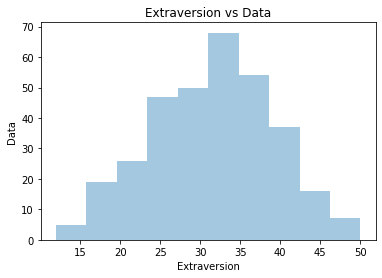

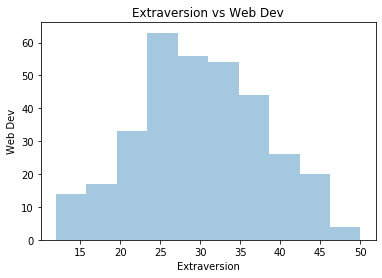

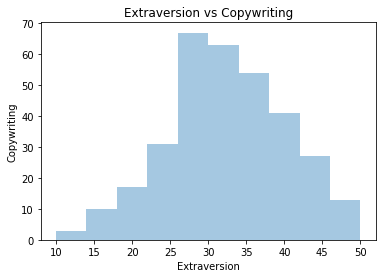

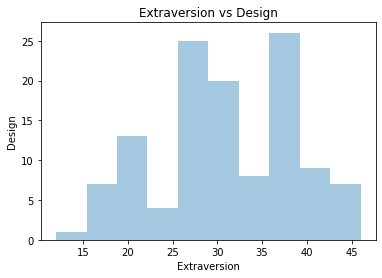

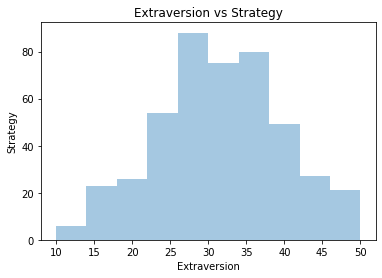

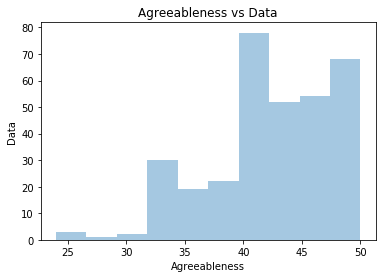

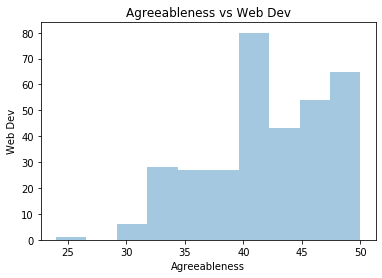

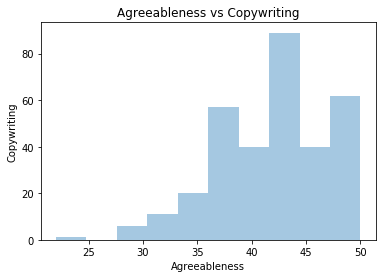

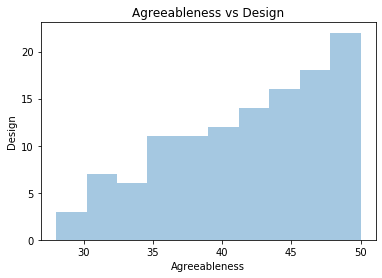

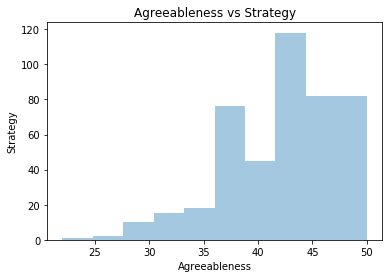

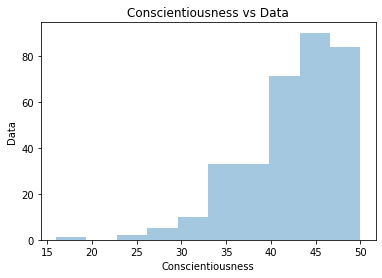

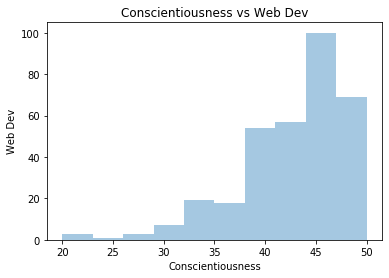

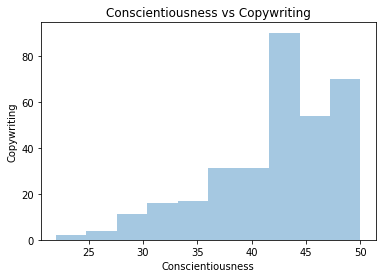

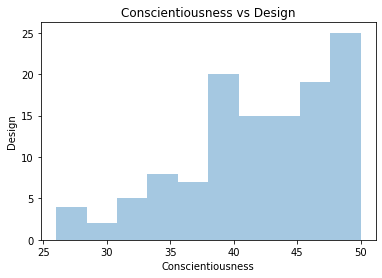

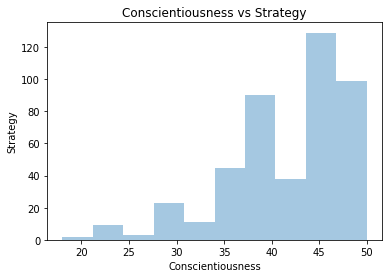

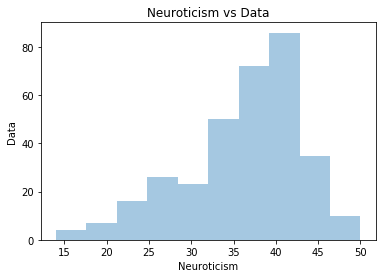

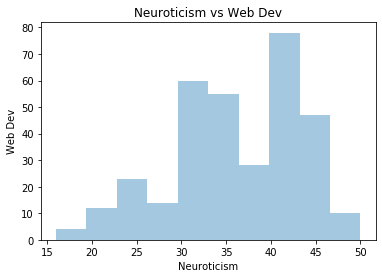

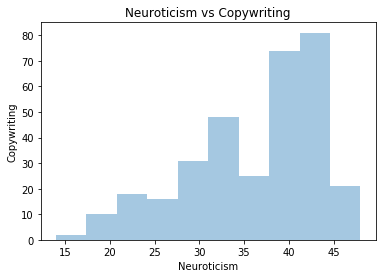

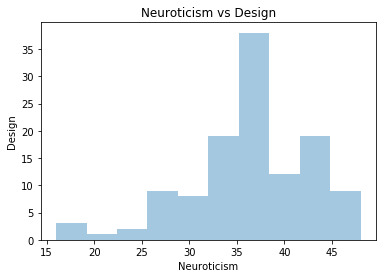

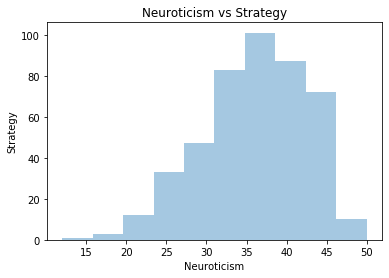

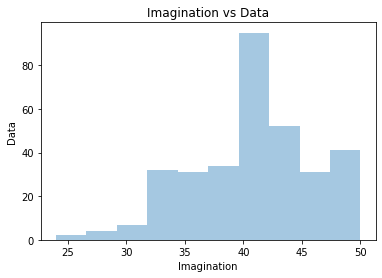

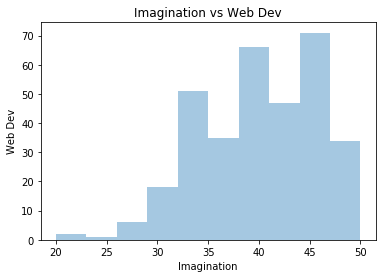

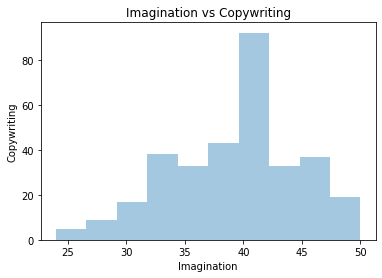

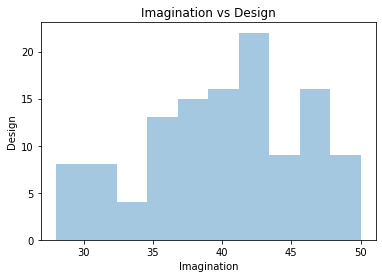

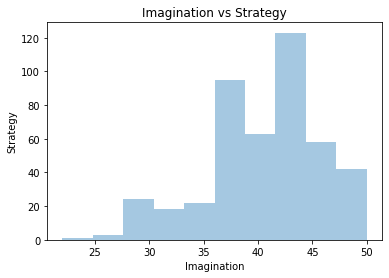

TypeError: ("'NoneType' object is not callable", 'occurred at index index')

In [113]:
def my_histo(columns, Department_g):
    '''Return Histographs of columns inserteed vs other columns
    columns = Series;
    Department_g = Groups of departments
    '''
    for i in columns:
        for j in Department_g:
            xv = merged_data[merged_data['Department']== f'{j}']
            sns.distplot(xv[i], bins=10, kde=False)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(f'{i} vs {j}')
            plt.show()
    return plt.show()

columns = ["Extraversion","Agreeableness","Conscientiousness","Neuroticism","Imagination"]
Depart_groups = ['Data','Web Dev','Copywriting','Design','Strategy']
merged_tidy.apply(my_histo(columns, Depart_groups))

In [34]:
merged_tidy = merged_data.dropna(axis='columns')

In [35]:
merged_tidy.head()

,Department,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Imagination,Extraversion_subscale,Agreeableness_subscale,Conscientiousnessn_subscale,Neuroticism_subscale,Imaginationn_subscale
ID,,,,,,,,,,,,,,,,,,,,,
0,Data,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,30,40,48,36,42,high,high,high,high,high
1,Data,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,42,46,46,40,42,high,high,high,high,high
2,Data,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,28,40,40,38,42,high,high,high,high,high
3,Data,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,30,38,38,40,38,high,high,high,high,high
4,Data,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,28,34,46,38,36,high,high,high,high,high


In [116]:
high_risk = merged_tidy.loc[merged_tidy['Neuroticism_subscale'] == 'low', 'index'] | merged_tidy.loc[merged_tidy['Agreeableness_subscale'] == 'low', 'index'] | merged_tidy.loc[merged_tidy['Conscientiousnessn_subscale'] == 'low', 'index']
high_risk

ID
18       True
27       True
526     False
584     False
663      True
960     False
1154     True
Name: index, dtype: bool